<a href="https://colab.research.google.com/github/leobonn1/devai/blob/main/iaam_trabalho4_leonardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip titanic.zip

unzip:  cannot find or open titanic.zip, titanic.zip.zip or titanic.zip.ZIP.


In [ ]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train.columns.isin(test.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
y = train['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
X = train.drop('Survived', axis=1)
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
X.columns.isin(test.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosDesejados(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.atributosIndesejados_ = ['PassengerId', 'Name', 'Ticket', 'Cabin']
    return self
  def transform(self, X, y=None):
    return X.drop(self.atributosIndesejados_, axis=1)

atributosDesejados = AtributosDesejados()
Xdrop = atributosDesejados.fit_transform(X)
Xdrop.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosNumericos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.atributosNumericos = X.select_dtypes(include='number').columns
    return self
  def transform(self, X, y=None):
    return X[self.atributosNumericos]

atributosNumericos = AtributosNumericos()
Xnum = atributosNumericos.fit_transform(Xdrop)
Xnum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipenum = Pipeline([
    ('atributos_numericos', AtributosNumericos()),
    ('imputer', SimpleImputer(strategy="median")), # TO DO: TESTAR OUTRAS strategy (median??)
    ('scaler', StandardScaler())
])

XnumLimpo = pipenum.fit_transform(Xdrop)
XnumLimpo

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosCategoricos(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    self.atributosCategoricos = X.select_dtypes(include='object').columns
    return self
  def transform(self, X, y=None):
    return X[self.atributosCategoricos]

atributosCategoricos = AtributosCategoricos()
Xcat = atributosCategoricos.fit_transform(Xdrop)
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

pipecat = Pipeline([
    ('atributos_categoricos', AtributosCategoricos()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

XcatLimpo = pipecat.fit_transform(Xdrop)
XcatLimpo.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [ ]:
pipecat.named_steps['encoder'].get_feature_names_out()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [ ]:
from sklearn.pipeline import FeatureUnion

unecaracteristicas = FeatureUnion([
    ('pipenum', pipenum),
    ('pipecat', pipecat)
])

Xtratado = unecaracteristicas.fit_transform(Xdrop)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
from sklearn.pipeline import Pipeline

preproc = Pipeline([
    ('atributos_desejados', AtributosDesejados()),
    ('unecaracteristicas', unecaracteristicas)
])

Xtratado = preproc.fit_transform(X)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pipetotal = Pipeline([
    ('preproc', preproc),
    ('arvore', DecisionTreeClassifier()) # TO DO: Estudar o DecisionTreeClasifier, testar parâmetros e outros classifiers
])

pipetotal.fit(X, y)
ypred = pipetotal.predict(X)
accuracy_score(y, ypred)

0.9797979797979798

In [ ]:
import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.01892877, 0.0142777 , 0.01510811, 0.01400042, 0.01524615]),
  'score_time': array([0.00589418, 0.00637197, 0.00566292, 0.00569916, 0.00586462]),
  'test_score': array([0.74301676, 0.79213483, 0.81460674, 0.73033708, 0.83146067])},
 0.7823112171238465)

In [ ]:
pipetotal.fit(X, y)
ypred = pipetotal.predict(test)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = ypred
submission.to_csv('tree_submission.csv', index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'arvore__max_depth': [None, 1, 3, 5, 7, 9],
    'preproc__unecaracteristicas__pipenum__imputer__strategy': ['mean', 'median', 'most_frequent']
}

modelo = GridSearchCV(pipetotal, param_grid=parametros)

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([2.98111629, 2.13403893, 1.94622564, 1.89871049, 1.98284435]),
  'score_time': array([0.00889683, 0.00608706, 0.00568342, 0.00923467, 0.00566149]),
  'test_score': array([0.81564246, 0.81460674, 0.81460674, 0.78089888, 0.85393258])},
 0.8159374803841567)

In [ ]:
modelo.fit(X, y)
modelo.best_estimator_

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('atributos_desejados', AtributosDesejados()),
                                 ('unecaracteristicas',
                                  FeatureUnion(transformer_list=[('pipenum',
                                                                  Pipeline(steps=[('atributos_numericos',
                                                                                   AtributosNumericos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('scaler',
                                                                                   StandardScaler())])),
                                                                 ('pipecat',
                                                                  Pipeline(steps=[('atributos_categoricos',
                                                                                   AtributosCategoricos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('encoder',
                                                                                   OneHotEncoder())]))]))])),
                ('arvore', DecisionTreeClassifier(max_depth=5))])

In [ ]:
submission = pd.read_csv('gender_submission.csv')
ypred = modelo.predict(test)
submission['Survived'] = ypred
submission.to_csv('tree_gscv_submission.csv', index=False)

In [ ]:
pd.DataFrame(modelo.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values(by=['mean_test_score'])

,params,rank_test_score,mean_test_score
0,"{'arvore__max_depth': None, 'preproc__unecarac...",18,0.771069
2,"{'arvore__max_depth': None, 'preproc__unecarac...",17,0.781169
1,"{'arvore__max_depth': None, 'preproc__unecarac...",16,0.781175
3,"{'arvore__max_depth': 1, 'preproc__unecaracter...",13,0.786737
4,"{'arvore__max_depth': 1, 'preproc__unecaracter...",13,0.786737
5,"{'arvore__max_depth': 1, 'preproc__unecaracter...",13,0.786737
14,"{'arvore__max_depth': 7, 'preproc__unecaracter...",12,0.803590
15,"{'arvore__max_depth': 9, 'preproc__unecaracter...",11,0.805869
12,"{'arvore__max_depth': 7, 'preproc__unecaracter...",10,0.808066
13,"{'arvore__max_depth': 7, 'preproc__unecaracter...",9,0.808079


In [ ]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'arvore__max_depth': [ 3, 4, 5, 6, 7, 8, 9],
    'preproc__unecaracteristicas__pipenum__imputer__strategy': ['mean', 'median', 'most_frequent']
}

modelo = GridSearchCV(pipetotal, param_grid=parametros)

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([2.87745214, 2.26429367, 2.22893596, 2.25774145, 2.27395844]),
  'score_time': array([0.00587869, 0.00622535, 0.00700736, 0.00586128, 0.00824618]),
  'test_score': array([0.81564246, 0.82022472, 0.80898876, 0.78089888, 0.8258427 ])},
 0.8103195028560668)

In [ ]:
modelo.fit(X, y)
pd.DataFrame(modelo.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values(by=['mean_test_score'])

,params,rank_test_score,mean_test_score
4,"{'arvore__max_depth': 4, 'preproc__unecaracter...",21,0.704727
3,"{'arvore__max_depth': 4, 'preproc__unecaracter...",20,0.706984
9,"{'arvore__max_depth': 6, 'preproc__unecaracter...",19,0.708757
5,"{'arvore__max_depth': 4, 'preproc__unecaracter...",18,0.713197
13,"{'arvore__max_depth': 7, 'preproc__unecaracter...",17,0.725513
0,"{'arvore__max_depth': 3, 'preproc__unecaracter...",14,0.726478
1,"{'arvore__max_depth': 3, 'preproc__unecaracter...",14,0.726478
2,"{'arvore__max_depth': 3, 'preproc__unecaracter...",14,0.726478
14,"{'arvore__max_depth': 7, 'preproc__unecaracter...",13,0.727640
6,"{'arvore__max_depth': 5, 'preproc__unecaracter...",12,0.729503


In [ ]:
modelo.best_estimator_

Pipeline(steps=[('preproc',
                 Pipeline(steps=[('atributos_desejados', AtributosDesejados()),
                                 ('unecaracteristicas',
                                  FeatureUnion(transformer_list=[('pipenum',
                                                                  Pipeline(steps=[('atributos_numericos',
                                                                                   AtributosNumericos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='median')),
                                                                                  ('scaler',
                                                                                   StandardScaler())])),
                                                                 ('pipecat',
                                                                  Pipeline(steps=[('atributos_categoricos',
                                                                                   AtributosCategoricos()),
                                                                                  ('imputer',
                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                  ('encoder',
                                                                                   OneHotEncoder())]))]))])),
                ('arvore', DecisionTreeClassifier(max_depth=6))])

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'arvore__max_depth': [ 3, 5, 7, 9],
    'arvore__splitter' : ['best', 'random'],
    'arvore__min_samples_split' : [ 2, 4]
    #'preproc__unecaracteristicas__pipenum__imputer__strategy': ['mean', 'median', 'most_frequent']
}

modelo = GridSearchCV(pipetotal, param_grid=parametros)

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([3.85794044, 2.2000699 , 1.63953233, 1.61646771, 1.66934609]),
  'score_time': array([0.01073956, 0.0055418 , 0.00566435, 0.00561237, 0.00605464]),
  'test_score': array([0.81564246, 0.82022472, 0.81460674, 0.79775281, 0.8258427 ])},
 0.8148138848785387)

In [ ]:
modelo.fit(X, y)
pd.DataFrame(modelo.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values(by=['mean_test_score'])

,params,rank_test_score,mean_test_score
1,"{'arvore__max_depth': 3, 'arvore__min_samples_...",16,0.794664
9,"{'arvore__max_depth': 7, 'arvore__min_samples_...",15,0.796874
13,"{'arvore__max_depth': 9, 'arvore__min_samples_...",14,0.796887
15,"{'arvore__max_depth': 9, 'arvore__min_samples_...",13,0.800251
3,"{'arvore__max_depth': 3, 'arvore__min_samples_...",11,0.801343
7,"{'arvore__max_depth': 5, 'arvore__min_samples_...",11,0.801343
5,"{'arvore__max_depth': 5, 'arvore__min_samples_...",10,0.802511
8,"{'arvore__max_depth': 7, 'arvore__min_samples_...",9,0.805850
0,"{'arvore__max_depth': 3, 'arvore__min_samples_...",7,0.809196
2,"{'arvore__max_depth': 3, 'arvore__min_samples_...",7,0.809196


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pipetotal_2 = Pipeline([
    ('preproc', preproc),
    ('rand_forest', RandomForestClassifier())])

scores = cross_validate(pipetotal_2, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.41614079, 0.33620214, 0.27622962, 0.27331877, 0.2748847 ]),
  'score_time': array([0.02084637, 0.01427102, 0.01476884, 0.01438189, 0.01470375]),
  'test_score': array([0.75418994, 0.80898876, 0.85393258, 0.78089888, 0.8258427 ])},
 0.8047705730964786)

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'rand_forest__max_depth':  [None, 3, 5, 9],
    'preproc__unecaracteristicas__pipenum__imputer__strategy': ['mean', 'median', 'most_frequent']
}

modelo = GridSearchCV(pipetotal_2, param_grid=parametros)

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([15.5730238 , 14.62504244, 14.8072834 , 14.93219304, 15.14037633]),
  'score_time': array([0.01270604, 0.01423979, 0.01259971, 0.01323414, 0.02130771]),
  'test_score': array([0.80446927, 0.80337079, 0.8258427 , 0.81460674, 0.85955056])},
 0.8215680120519743)

In [ ]:
submission = pd.read_csv('gender_submission.csv')
modelo.fit(X,y)
ypred = modelo.predict(test)
submission['Survived'] = ypred
submission.to_csv('random_forest_submission.csv', index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'rand_forest__max_depth':  [3, 5, 7, 9],
    'rand_forest__n_estimators': [150, 170],
    #'preproc__unecaracteristicas__pipenum__imuter__strategy': ['mean', 'median', 'most_frequent']
}

modelo = GridSearchCV(pipetotal_2, param_grid=parametros)

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([14.82608199, 14.67283964, 14.90288234, 14.69541931, 14.72071409]),
  'score_time': array([0.01625562, 0.01836133, 0.01627564, 0.01724458, 0.01902199]),
  'test_score': array([0.80446927, 0.8258427 , 0.8258427 , 0.80337079, 0.84269663])},
 0.8204444165463561)

In [ ]:
modelo.fit(X, y)
pd.DataFrame(modelo.cv_results_)[['params','rank_test_score','mean_test_score']].sort_values(by=['mean_test_score'])

,params,rank_test_score,mean_test_score
0,"{'rand_forest__max_depth': 3, 'rand_forest__n_...",8,0.801318
1,"{'rand_forest__max_depth': 3, 'rand_forest__n_...",7,0.806936
3,"{'rand_forest__max_depth': 5, 'rand_forest__n_...",6,0.820426
2,"{'rand_forest__max_depth': 5, 'rand_forest__n_...",5,0.820438
5,"{'rand_forest__max_depth': 7, 'rand_forest__n_...",4,0.820451
6,"{'rand_forest__max_depth': 9, 'rand_forest__n_...",3,0.823803
4,"{'rand_forest__max_depth': 7, 'rand_forest__n_...",2,0.823828
7,"{'rand_forest__max_depth': 9, 'rand_forest__n_...",1,0.831668


In [ ]:
submission = pd.read_csv('gender_submission.csv')
modelo.fit(X,y)
ypred = modelo.predict(test)
submission['Survived'] = ypred
submission.to_csv('random_forest_submission_2.csv', index=False)

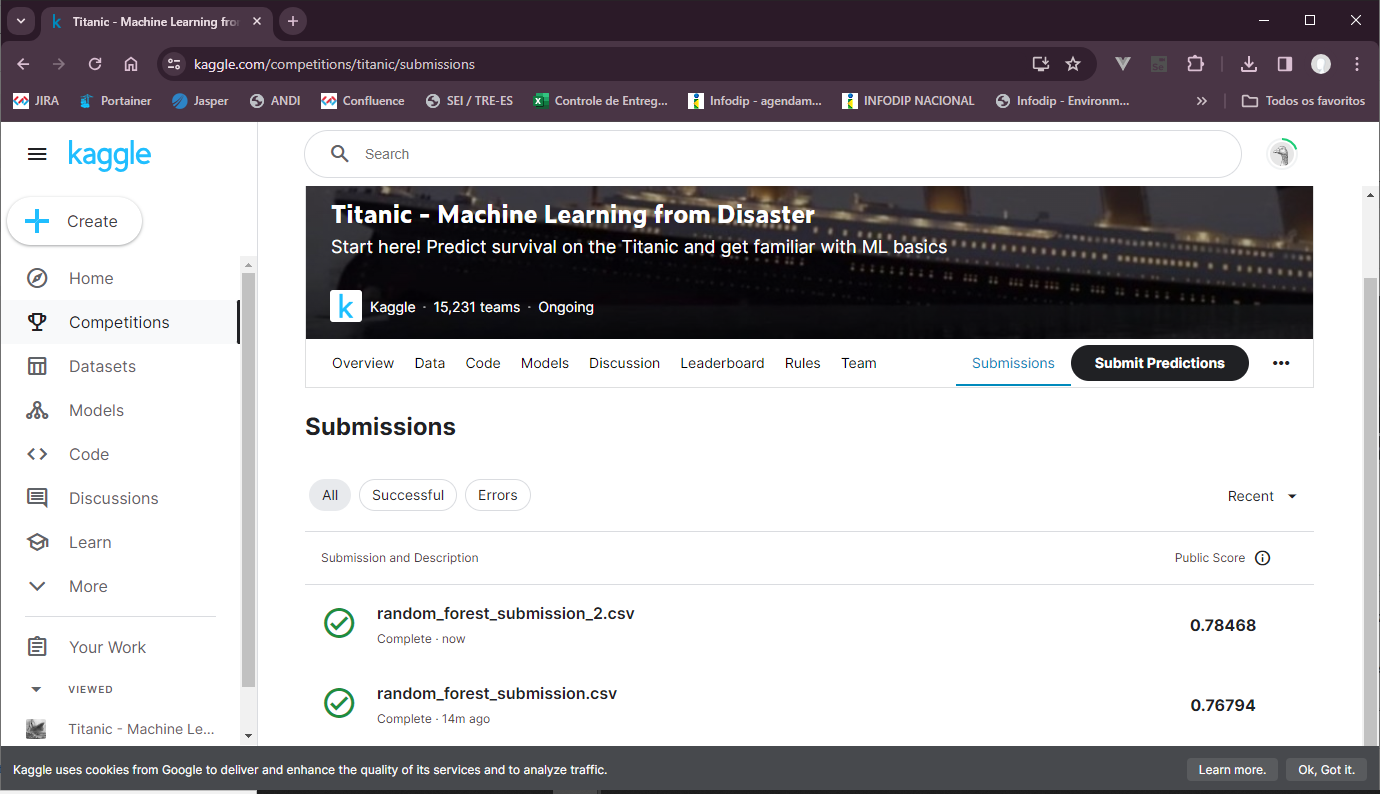